In [2]:
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.6 MB 12.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.7/12.6 MB 9.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/12.6 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.6 MB 6.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/12.6 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/12.6 MB 5.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/12.6 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.6 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/12.6 MB 4.8 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from matplotlib import pyplot as plt

In [14]:
# Load the MNIST dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
# Print the shapes of the datasets
print('X train:', train_x.shape)
print('Y train:', train_y.shape)
print('X test:', test_x.shape)
print('Y test:', test_y.shape)

X train: (60000, 28, 28)
Y train: (60000,)
X test: (10000, 28, 28)
Y test: (10000,)


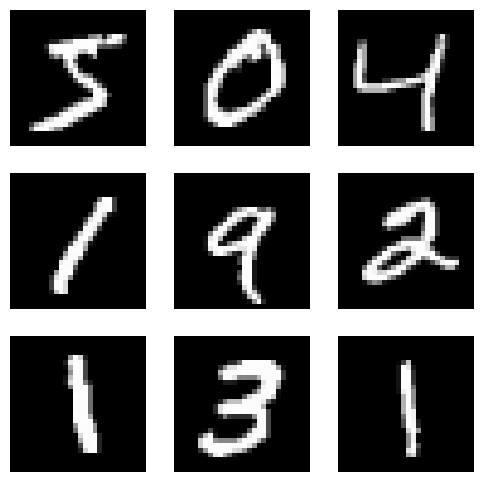

In [16]:
# Display the first 9 images from the training set
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

In [17]:
# Normalize the data
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

In [18]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\Pradnya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8703 - loss: 0.4553 - val_accuracy: 0.9640 - val_loss: 0.1292
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9610 - loss: 0.1298 - val_accuracy: 0.9728 - val_loss: 0.0963
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9766 - loss: 0.0817 - val_accuracy: 0.9748 - val_loss: 0.0928
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0611 - val_accuracy: 0.9752 - val_loss: 0.0863
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 0.9772 - val_loss: 0.0808
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0333 - val_accuracy: 0.9780 - val_loss: 0.0819
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0282 - val_accuracy: 0.9788 - val_loss: 0.0805
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0240 - 

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(test_x, test_y)
print("\nTest Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0830

Test Loss: 0.06953157484531403
Test Accuracy: 0.9807000160217285


In [22]:
# Make predictions
predictions = model.predict(test_x)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
# Show prediction for the first test image
print("\nProbabilities:", predictions[0])
print("Prediction:", np.argmax(predictions[0]))
print("Actual:", test_y[0])


Probabilities: [8.2715568e-09 2.3057768e-10 1.6720875e-07 2.4844406e-04 1.3970539e-12
 7.6889500e-10 6.5339329e-14 9.9973887e-01 4.1240264e-06 8.3854429e-06]
Prediction: 7
Actual: 7


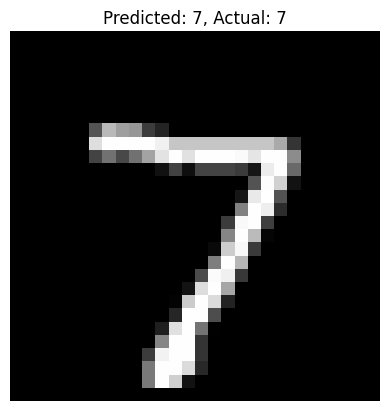

In [24]:
# Display the first test image
plt.imshow(test_x[0], cmap=plt.get_cmap('gray'))
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {test_y[0]}")
plt.axis('off')
plt.show()